In [1]:
import pycaret
import mlflow
# check version
from pycaret.utils import version

In [2]:
# Read in the dataset 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("Merged_snp_epi_data.csv")

In [4]:
# data shapes
data.dtypes

Unnamed: 0       int64
Sample          object
HIV            float64
AGE              int64
SEX              int64
                ...   
POS_4410386      int64
POS_4410765      int64
POS_4411016      int64
POS_4411276      int64
POS_4411400      int64
Length: 17642, dtype: object

In [5]:
data.shape

(216, 17642)

In [6]:
data.head()

,Unnamed: 0,Sample,HIV,AGE,SEX,STM,INH,RIF,EMB,ART,...,POS_4409794,POS_4409954,POS_4410142,POS_4410178,POS_4410212,POS_4410386,POS_4410765,POS_4411016,POS_4411276,POS_4411400
0,0,ERR038736,0.0,30,0,0.0,1.0,1.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,ERR038737,0.0,23,1,0.0,1.0,1.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,ERR038738,0.0,20,1,1.0,1.0,1.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,ERR038739,0.0,27,1,1.0,1.0,1.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,ERR038740,0.0,48,0,0.0,1.0,1.0,1.0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Convert multiple columns to categorical
# Converting columns to catergorical
#columns_to_convert = ['SEX', 'HIV', 'RIF', 'INH', 'EMB', 'STM']

#ML_data[columns_to_convert] = ML_data[columns_to_convert].astype('category')

In [7]:
# Create a copy of the DataFrame
ML_data = data.copy()

In [8]:
# Removing the ART and PREVIOS TB TREATMENT COLUMN TO AVOID A LOT UN ACCURATE DATA ESPECIALLY BECAUSE THERE WAS ALOT OF MISSINGNESS
# List of columns to delete
columns_to_delete = ['ART', 'PREV.TB_TREATMENT']

# Drop the specified columns
ML_data = ML_data.drop(columns=columns_to_delete)

In [9]:
# Remove the unnamed column (assuming it's the last column, you might need to adjust the index)
ML_data = ML_data.drop(ML_data.columns[ML_data.columns.str.contains('Unnamed', case=False)], axis=1)


In [10]:
 ML_data.head()

,Sample,HIV,AGE,SEX,STM,INH,RIF,EMB,POS_1552,POS_1908,...,POS_4409794,POS_4409954,POS_4410142,POS_4410178,POS_4410212,POS_4410386,POS_4410765,POS_4411016,POS_4411276,POS_4411400
0,ERR038736,0.0,30,0,0.0,1.0,1.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ERR038737,0.0,23,1,0.0,1.0,1.0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ERR038738,0.0,20,1,1.0,1.0,1.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ERR038739,0.0,27,1,1.0,1.0,1.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ERR038740,0.0,48,0,0.0,1.0,1.0,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
ML_data.dtypes

Sample          object
HIV            float64
AGE              int64
SEX              int64
STM            float64
                ...   
POS_4410386      int64
POS_4410765      int64
POS_4411016      int64
POS_4411276      int64
POS_4411400      int64
Length: 17639, dtype: object

In [12]:
# Assuming 'df' is your DataFrame
columns_to_exclude = ['Sample', 'AGE']

# Get a list of all column names
all_columns = ML_data.columns.tolist()

# Filter out columns to exclude
categorical_columns = [col for col in all_columns if col not in columns_to_exclude]

# Convert selected columns to categorical
ML_data[categorical_columns] = ML_data[categorical_columns].astype('category')


In [13]:
ML_data.dtypes

Sample           object
HIV            category
AGE               int64
SEX            category
STM            category
                 ...   
POS_4410386    category
POS_4410765    category
POS_4411016    category
POS_4411276    category
POS_4411400    category
Length: 17639, dtype: object

In [14]:
# Perform one-hot encoding
ML_data_encoded = pd.get_dummies(ML_data, columns=categorical_columns)


In [15]:
ML_data_encoded.head()

,Sample,AGE,HIV_0.0,HIV_1.0,SEX_0,SEX_1,STM_0.0,STM_1.0,INH_0.0,INH_1.0,...,POS_4410386_0,POS_4410386_1,POS_4410765_0,POS_4410765_1,POS_4411016_0,POS_4411016_1,POS_4411276_0,POS_4411276_1,POS_4411400_0,POS_4411400_1
0,ERR038736,30,1,0,1,0,1,0,0,1,...,1,0,1,0,1,0,1,0,1,0
1,ERR038737,23,1,0,0,1,1,0,0,1,...,1,0,1,0,1,0,1,0,1,0
2,ERR038738,20,1,0,0,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
3,ERR038739,27,1,0,0,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
4,ERR038740,48,1,0,1,0,1,0,0,1,...,1,0,1,0,1,0,1,0,1,0


In [14]:
ML_data_encoded.dtypes

Sample           object
AGE               int64
HIV_0.0           uint8
HIV_1.0           uint8
SEX_0             uint8
                  ...  
POS_4411016_1     uint8
POS_4411276_0     uint8
POS_4411276_1     uint8
POS_4411400_0     uint8
POS_4411400_1     uint8
Length: 35116, dtype: object

In [16]:
Encoded_data = ML_data_encoded.copy()

In [16]:
Encoded_data.to_csv("Encoded_data.csv")

In [17]:
Encoded_data.head()

,Sample,AGE,HIV_0.0,HIV_1.0,SEX_0,SEX_1,STM_0.0,STM_1.0,INH_0.0,INH_1.0,...,POS_4410386_0,POS_4410386_1,POS_4410765_0,POS_4410765_1,POS_4411016_0,POS_4411016_1,POS_4411276_0,POS_4411276_1,POS_4411400_0,POS_4411400_1
0,ERR038736,30,1,0,1,0,1,0,0,1,...,1,0,1,0,1,0,1,0,1,0
1,ERR038737,23,1,0,0,1,1,0,0,1,...,1,0,1,0,1,0,1,0,1,0
2,ERR038738,20,1,0,0,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
3,ERR038739,27,1,0,0,1,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
4,ERR038740,48,1,0,1,0,1,0,0,1,...,1,0,1,0,1,0,1,0,1,0


In [17]:
#Now for the EMB drug
# List of columns to exclude
exclude_columns2 = ['EMB', 'INH', 'RIF']

# Create a new DataFrame excluding the specified columns
stm_data = ML_data.drop(exclude_columns2, axis=1)
stm_data.head()

,Sample,HIV,AGE,SEX,STM,POS_1552,POS_1908,POS_1977,POS_2423,POS_2532,...,POS_4409794,POS_4409954,POS_4410142,POS_4410178,POS_4410212,POS_4410386,POS_4410765,POS_4411016,POS_4411276,POS_4411400
0,ERR038736,0.0,30,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ERR038737,0.0,23,1,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ERR038738,0.0,20,1,1.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ERR038739,0.0,27,1,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ERR038740,0.0,48,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
stm_data.dtypes

Sample           object
HIV            category
AGE               int64
SEX            category
STM            category
                 ...   
POS_4410386    category
POS_4410765    category
POS_4411016    category
POS_4411276    category
POS_4411400    category
Length: 17636, dtype: object

<Axes: >

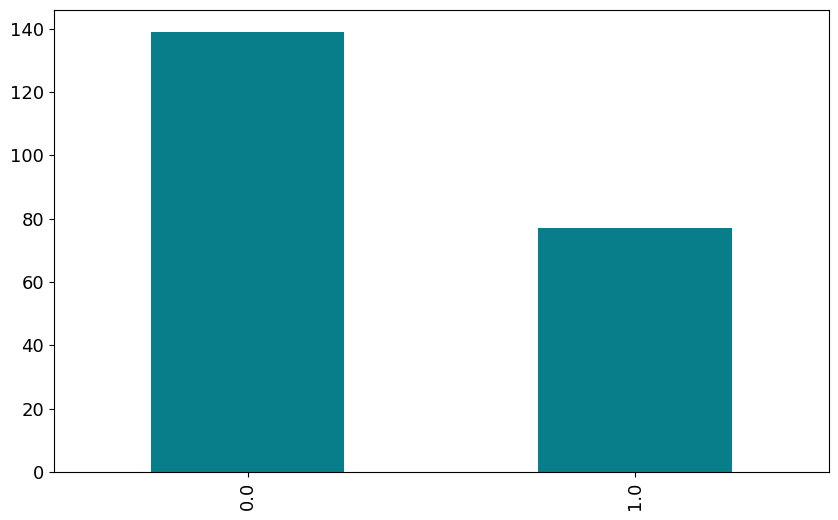

In [19]:
stm_data['STM'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')

In [20]:
stm_data = stm_data.drop("Sample", axis = 1)

In [21]:
stm_data['STM'] = stm_data['STM'].astype('int')

In [22]:
stm_data.head()

,HIV,AGE,SEX,STM,POS_1552,POS_1908,POS_1977,POS_2423,POS_2532,POS_2540,...,POS_4409794,POS_4409954,POS_4410142,POS_4410178,POS_4410212,POS_4410386,POS_4410765,POS_4411016,POS_4411276,POS_4411400
0,0.0,30,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,23,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,20,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,27,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0.0,48,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [23]:
from pycaret.classification import *

# List of categorical columns (excluding 'AGE' and the excluded columns)
#categorical_columns = emb_data.columns.difference(['AGE','EMB']).tolist()

# Set up PyCaret with excluded columns as targets
clf2 = setup(data=stm_data, target= 'STM', session_id=123,
             normalize=True,
             numeric_features=['AGE'],
             bin_numeric_features=['AGE'],
             feature_selection=True,
             #ignore_features=['Sample'],
             log_experiment=True, experiment_name='Drug_resistance_prediction_STM',
             train_size=0.8)  # Set train size to 80%)




[LightGBM] [Info] Number of positive: 61, number of negative: 111
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003871 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3570
[LightGBM] [Info] Number of data points in the train set: 172, number of used features: 1189
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.354651 -> initscore=-0.598656
[LightGBM] [Info] Start training from score -0.598656
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

,Description,Value
0,Session id,123
1,Target,STM
2,Target type,Binary
3,Original data shape,"(216, 17635)"
4,Transformed data shape,"(216, 3527)"
5,Transformed train set shape,"(172, 3527)"
6,Transformed test set shape,"(44, 3527)"
7,Ordinal features,14202
8,Numeric features,1
9,Categorical features,17633


2023/10/12 23:36:21 INFO mlflow.tracking.fluent: Experiment with name 'Drug_resistance_prediction_STM' does not exist. Creating a new experiment.


In [25]:
best_stm = compare_models(n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7157,0.7343,0.4429,0.5712,0.4892,0.3202,0.3277,220.7210
dt,Decision Tree Classifier,0.7098,0.6596,0.4905,0.5986,0.5168,0.3317,0.3485,225.5410
lightgbm,Light Gradient Boosting Machine,0.7042,0.7781,0.4929,0.5957,0.5272,0.3200,0.3283,226.5960
lr,Logistic Regression,0.6984,0.7097,0.5571,0.5964,0.5566,0.3334,0.3452,247.5230
rf,Random Forest Classifier,0.6928,0.7287,0.4238,0.6036,0.4751,0.2739,0.2934,229.2550
svm,SVM - Linear Kernel,0.6817,0.0000,0.5738,0.5521,0.5590,0.3104,0.3127,234.2010
ada,Ada Boost Classifier,0.6807,0.7244,0.4905,0.5967,0.5204,0.2852,0.2997,226.7840
et,Extra Trees Classifier,0.6699,0.7300,0.4405,0.5939,0.4758,0.2471,0.2675,234.0750
knn,K Neighbors Classifier,0.6510,0.6794,0.6214,0.5254,0.5587,0.2769,0.2898,273.1180
dummy,Dummy Classifier,0.6454,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,538.2870


In [27]:
# Obtaining a dataframe for the compare resuslts
compare_tree_models_results = pull()
compare_tree_models_results.to_csv("Plots/Top3_models_table_STM.csv")

In [31]:
model_names = ["GradientBoostingClassifier",
              "DecisionTreeClassifier", 
              "LGBMClassifier"]

In [32]:
#AUC plots

for i in range(3):
    plot_name= "ROC Curves  for  " + model_names[i] + '  (STM)'
    plot_model(best_stm[i], plot = 'auc', save=True, plot_kwargs = {'title' : plot_name})
    newname="Plots/AUC_STM"+str(i)+".png"
    
    import os
    os.rename('AUC.png', newname)

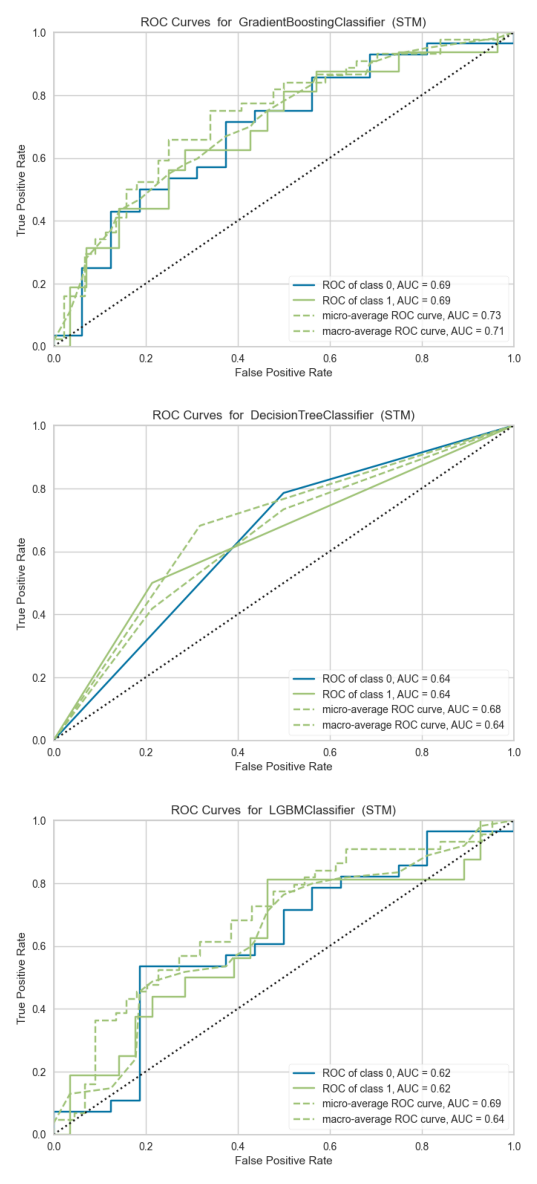

In [53]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the file paths
file_paths = ["Plots/STM/AUC_STM0.png", 
              "Plots/STM/AUC_STM1.png", 
              "Plots/STM/AUC_STM2.png"]

# Read the PNG files
plots = [mpimg.imread(path) for path in file_paths]

# Create subplots with two rows and two columns
#fig, axes = plt.subplots(3, 1, figsize=(5, 15), gridspec_kw={'height_ratios': [1,1,1]})

fig, axes = plt.subplots(3, 1, figsize=(6, 12), gridspec_kw={'height_ratios': [1, 1, 1]})


# Display the images
for i, (plot, ax) in enumerate(zip(plots, axes.flatten())):
    ax.imshow(plot)
    ax.axis('off')
    #ax.set_title(f'Plot {i+1}')

# Adjust layout
plt.tight_layout()
# Save the plot
plt.savefig('Plots/AUC_STM_top3.png',dpi =600)
# Show the plots
plt.show()

In [34]:
#confusion_matrix
for i in range(3):
    plot_name= "Confusion Matrix  for  " + model_names[i] + '  (STM)'
    plot_model(best_stm[i], plot = 'confusion_matrix', save=True, plot_kwargs = {'title' : plot_name})
    newname="Plots/CM_STM"+str(i)+".png"
    
    import os
    os.rename('Confusion Matrix.png', newname)

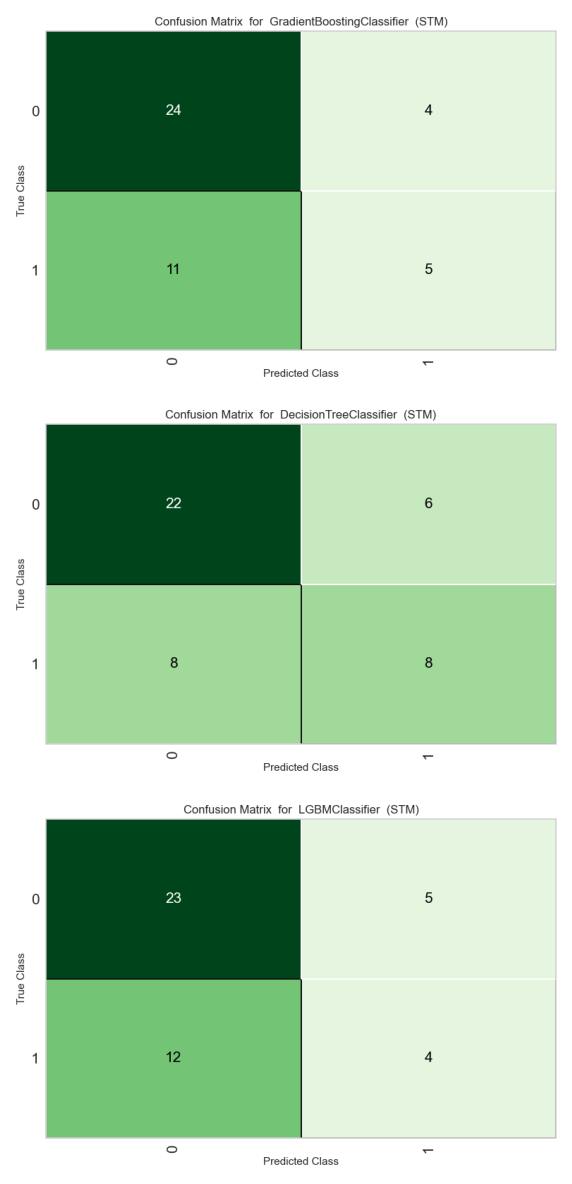

In [35]:
#Combine Confusion Matrix plots

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the file paths
file_paths = ["Plots/CM_STM0.png", 
              "Plots/CM_STM1.png", 
              "Plots/CM_STM2.png"]

# Read the PNG files
plots = [mpimg.imread(path) for path in file_paths]

# Create subplots with two rows and two columns
#fig, axes = plt.subplots(3, 1, figsize=(5, 15), gridspec_kw={'height_ratios': [1,1,1]})

fig, axes = plt.subplots(3, 1, figsize=(6, 12), gridspec_kw={'height_ratios': [1, 1, 1]})


# Display the images
for i, (plot, ax) in enumerate(zip(plots, axes.flatten())):
    ax.imshow(plot)
    ax.axis('off')
    #ax.set_title(f'Plot {i+1}')

# Adjust layout
plt.tight_layout()
# Save the plot
plt.savefig('Plots/CM_STM_top3.png',dpi =600)
# Show the plots
plt.show()

In [36]:
#Precision Recal plots
for i in range(3):
    plot_name= "Precision-Recall Curve  for  " + model_names[i] + '  (STM)'
    plot_model(best_stm[i], plot = 'pr', save=True, plot_kwargs = {'title' : plot_name})
    newname="Plots/PR_STM"+str(i)+".png"
    
    import os
    os.rename('Precision Recall.png', newname)

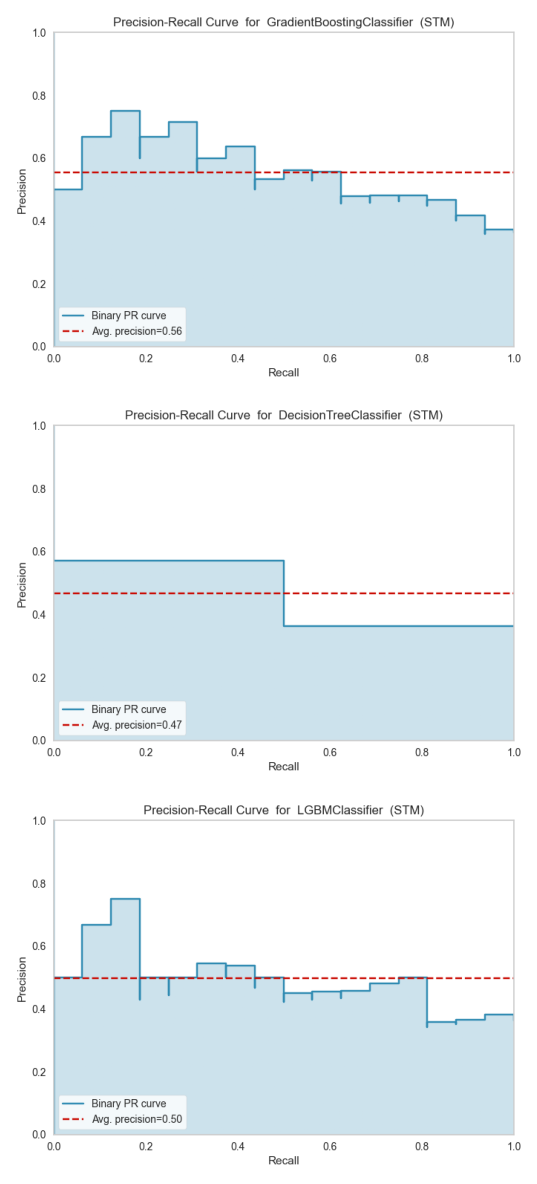

In [37]:
#Combine PR plots

# Define the file paths
file_paths = ["Plots/PR_STM0.png", 
              "Plots/PR_STM1.png", 
              "Plots/PR_STM2.png"]

# Read the PNG files
plots = [mpimg.imread(path) for path in file_paths]

# Create subplots with two rows and two columns
#fig, axes = plt.subplots(3, 1, figsize=(5, 15), gridspec_kw={'height_ratios': [1,1,1]})

fig, axes = plt.subplots(3, 1, figsize=(6, 12), gridspec_kw={'height_ratios': [1, 1, 1]})


# Display the images
for i, (plot, ax) in enumerate(zip(plots, axes.flatten())):
    ax.imshow(plot)
    ax.axis('off')
    #ax.set_title(f'Plot {i+1}')

# Adjust layout
plt.tight_layout()
# Save the plot
plt.savefig('Plots/PR_STM_top3.png',dpi =600)
# Show the plots
plt.show()

In [38]:
#Feature Importance

for i in range(3):
    plot_name= "Feature Importance Plot  for  " + model_names[i] + '  (STM)'
    plot_model(best_stm[i], plot = 'feature', save=True, plot_kwargs = {'title' : plot_name})
    newname="Plots/Feature_STM"+str(i)+".png"
    
    import os
    os.rename('Feature Importance.png', newname)

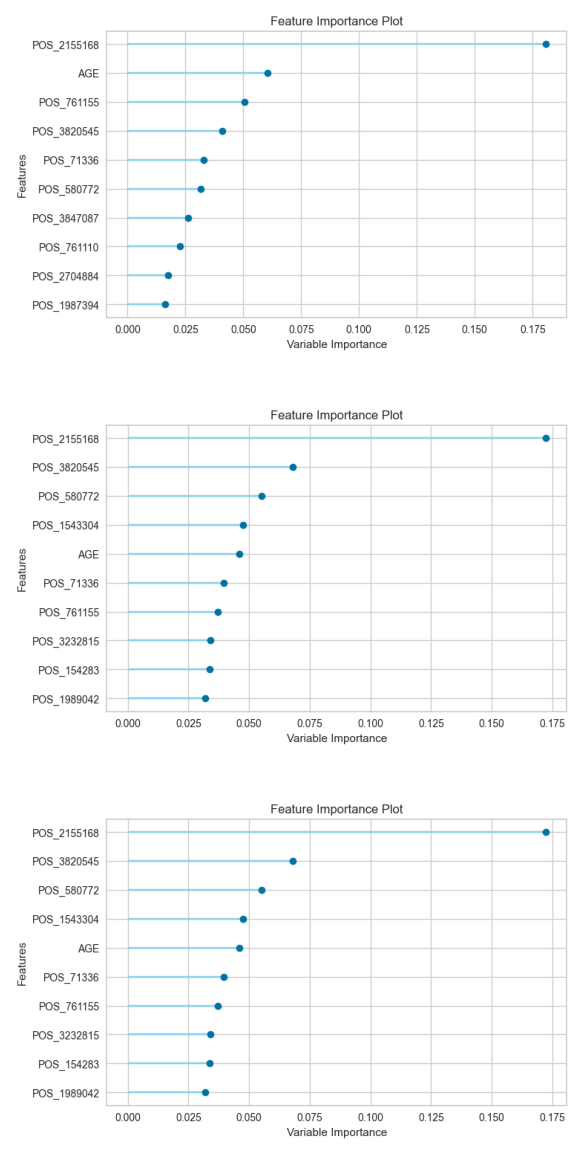

In [39]:
#Combine Feature Importance plots

# Define the file paths
file_paths = ["Plots/Feature_STM0.png", 
              "Plots/Feature_STM1.png", 
              "Plots/Feature_STM1.png"]

# Read the PNG files
plots = [mpimg.imread(path) for path in file_paths]

# Create subplots with two rows and two columns
#fig, axes = plt.subplots(3, 1, figsize=(5, 15), gridspec_kw={'height_ratios': [1,1,1]})

fig, axes = plt.subplots(3, 1, figsize=(6, 12), gridspec_kw={'height_ratios': [1, 1, 1]})


# Display the images
for i, (plot, ax) in enumerate(zip(plots, axes.flatten())):
    ax.imshow(plot)
    ax.axis('off')
    #ax.set_title(f'Plot {i+1}')

# Adjust layout
plt.tight_layout()
# Save the plot
plt.savefig('Plots/Features_STM_top3.png',dpi =600)
# Show the plots
plt.show()

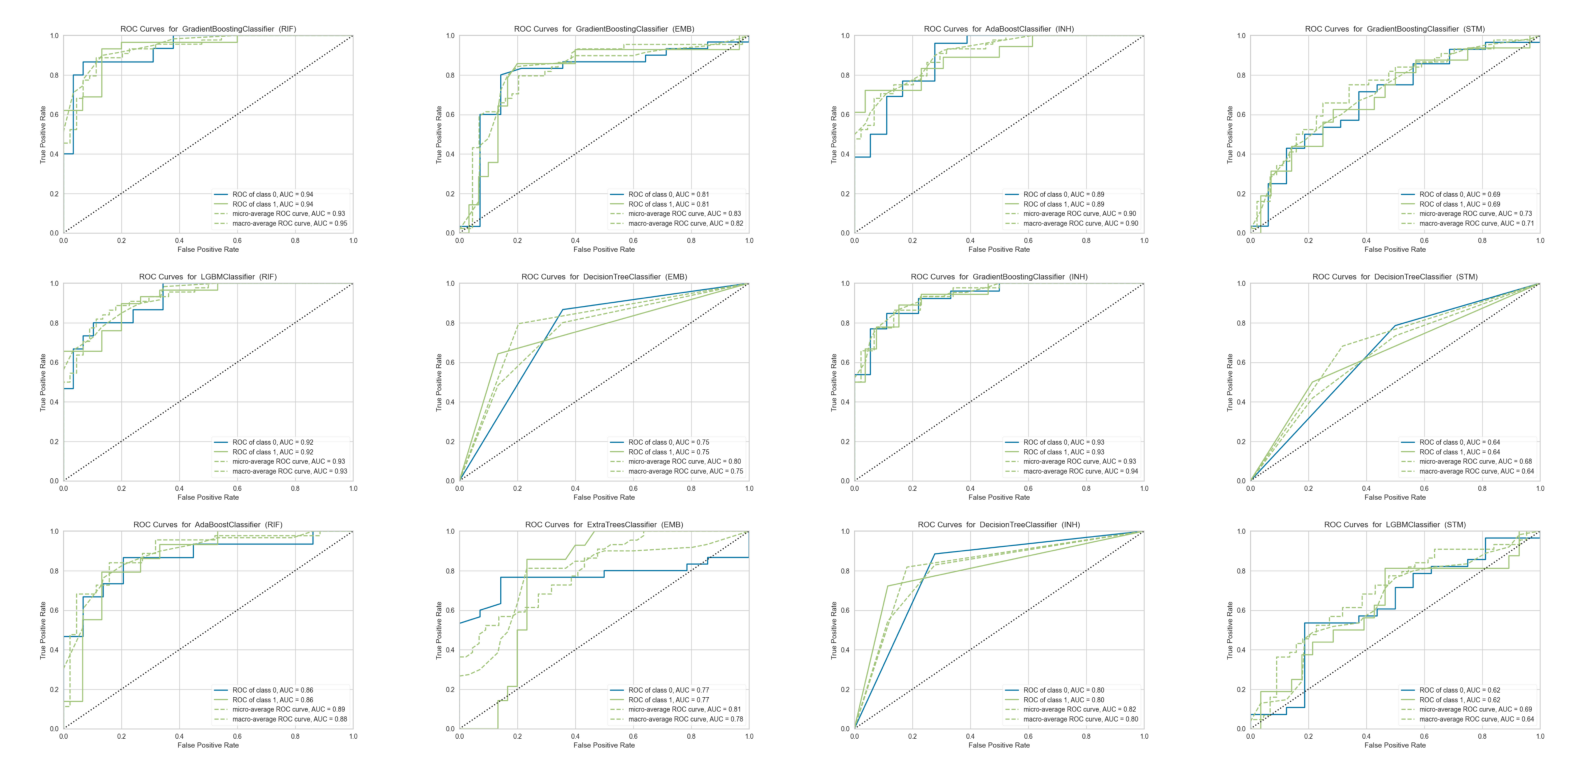

In [64]:
# combining the drugs into one plot

#AUC
file_paths = ["Plots/RIF/AUC_RIF_top3.png", 
              "Plots/EMB/AUC_EMB_top3.png", 
              "Plots/INH/AUC_INH_top3.png",
             "Plots/STM/AUC_STM_top3.png"]

# Read the PNG files
plots = [mpimg.imread(path) for path in file_paths]

# Create subplots with two rows and two columns
fig, axes = plt.subplots(1, 4, figsize=(16, 10), gridspec_kw={'height_ratios': [1]})

# Display the images
for i, (plot, ax) in enumerate(zip(plots, axes.flatten())):
    ax.imshow(plot)
    ax.axis('off')
    #ax.set_title(f'Plot {i+1}')

# Adjust layout
plt.tight_layout()
# Save the plot
plt.savefig('Plots/AUC_all_drugs.png',dpi =600)
# Show the plots
plt.show()



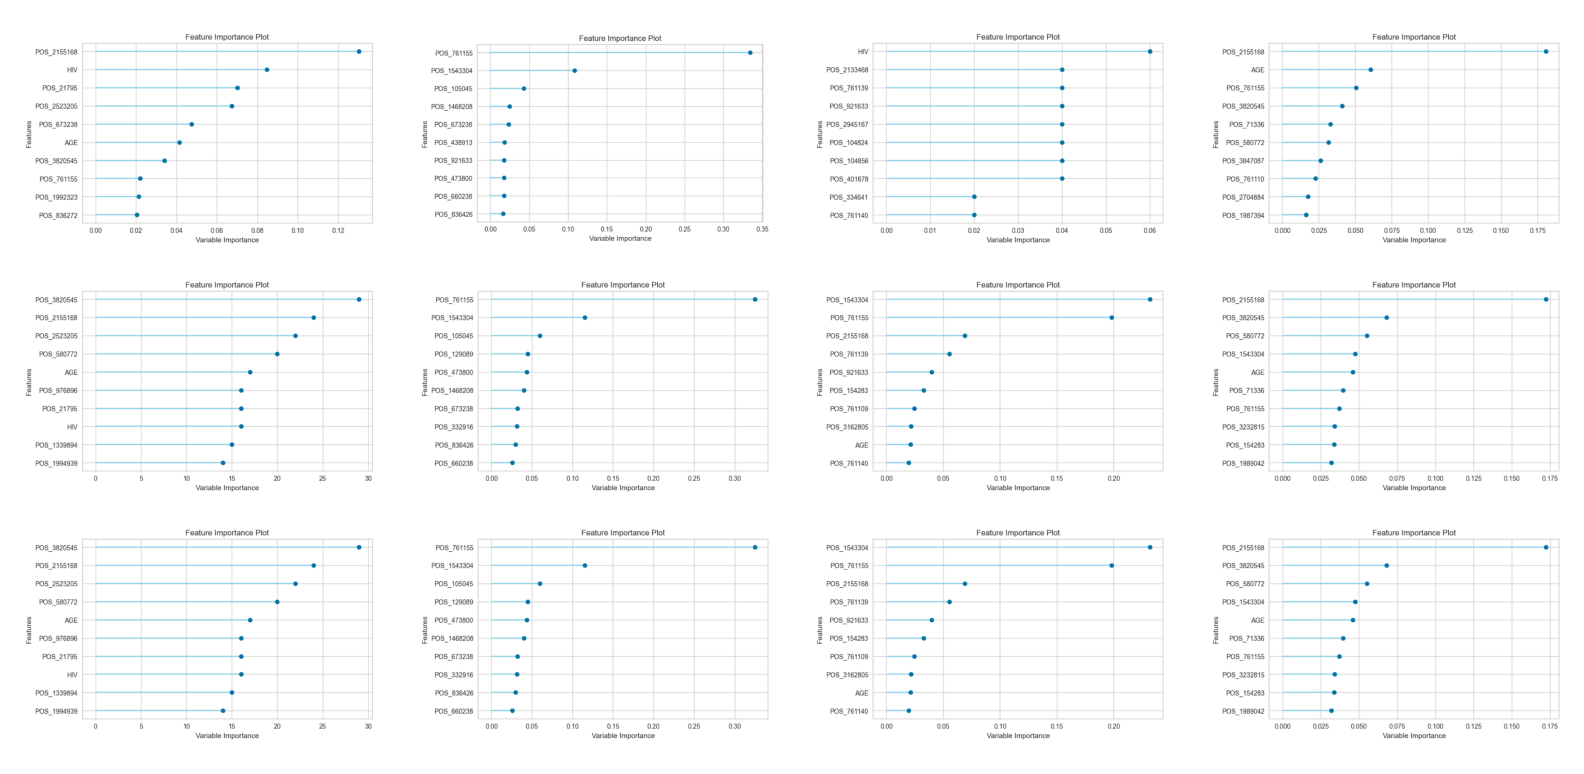

In [65]:
# combining the drugs into one plot

#AUC
file_paths = ["Plots/RIF/Features_RIF_top3.png", 
              "Plots/EMB/Features_EMB_top3.png", 
              "Plots/INH/Features_INH_top3.png",
             "Plots/STM/Features_STM_top3.png"]

# Read the PNG files
plots = [mpimg.imread(path) for path in file_paths]

# Create subplots with two rows and two columns
fig, axes = plt.subplots(1, 4, figsize=(16, 12), gridspec_kw={'height_ratios': [1]})

# Display the images
for i, (plot, ax) in enumerate(zip(plots, axes.flatten())):
    ax.imshow(plot)
    ax.axis('off')
    #ax.set_title(f'Plot {i+1}')

# Adjust layout
plt.tight_layout()
# Save the plot
plt.savefig('Plots/Features_all_drugs.png',dpi =600)
# Show the plots
plt.show()



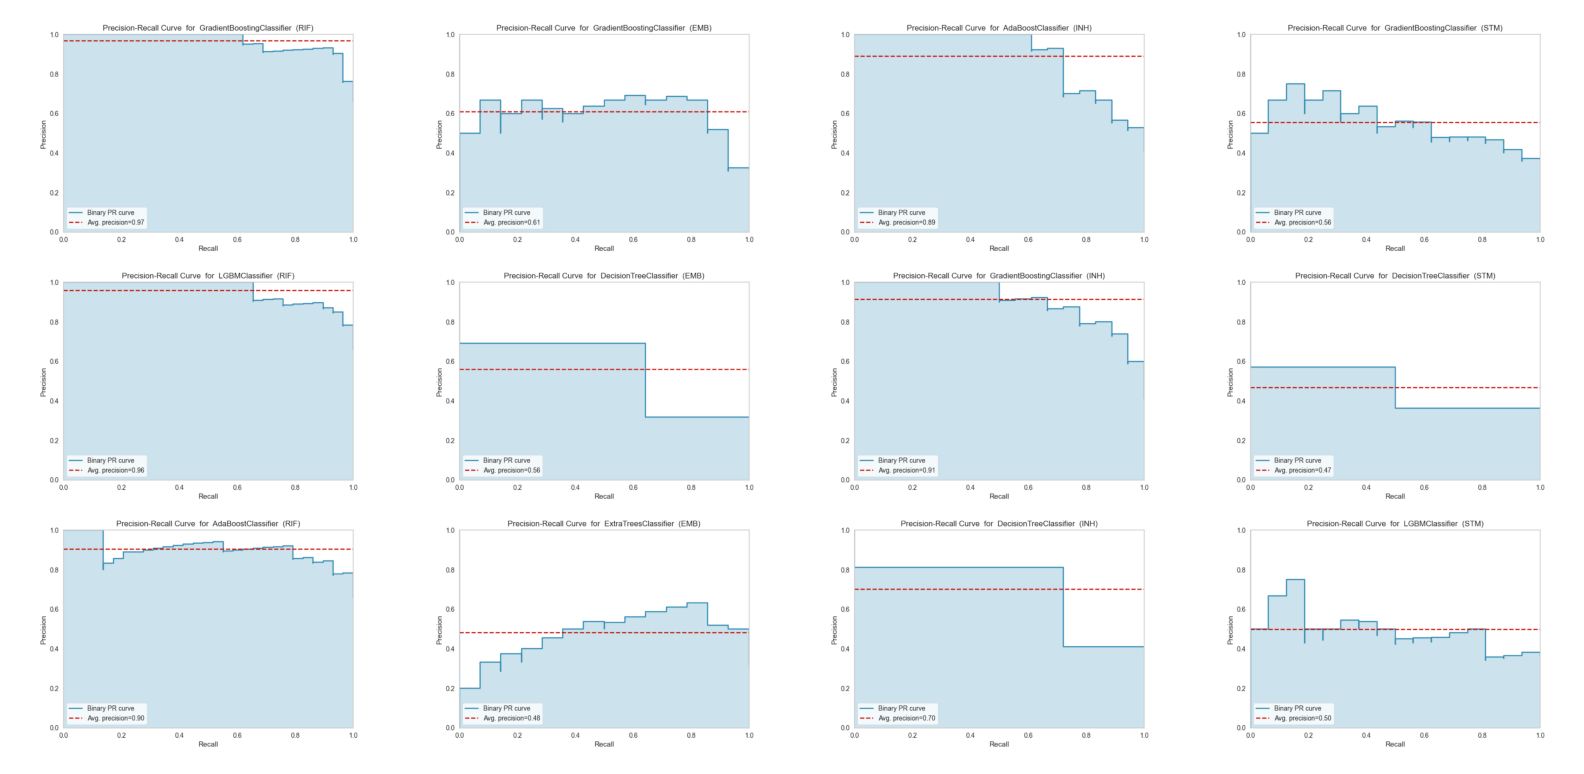

In [66]:
# combining the drugs into one plot

#AUC
file_paths = ["Plots/RIF/PR_RIF_top3.png", 
              "Plots/EMB/PR_EMB_top3.png", 
              "Plots/INH/PR_INH_top3.png",
             "Plots/STM/PR_STM_top3.png"]

# Read the PNG files
plots = [mpimg.imread(path) for path in file_paths]

# Create subplots with two rows and two columns
fig, axes = plt.subplots(1, 4, figsize=(16, 12), gridspec_kw={'height_ratios': [1]})

# Display the images
for i, (plot, ax) in enumerate(zip(plots, axes.flatten())):
    ax.imshow(plot)
    ax.axis('off')
    #ax.set_title(f'Plot {i+1}')

# Adjust layout
plt.tight_layout()
# Save the plot
plt.savefig('Plots/PR_all_drugs.png',dpi =600)
# Show the plots
plt.show()


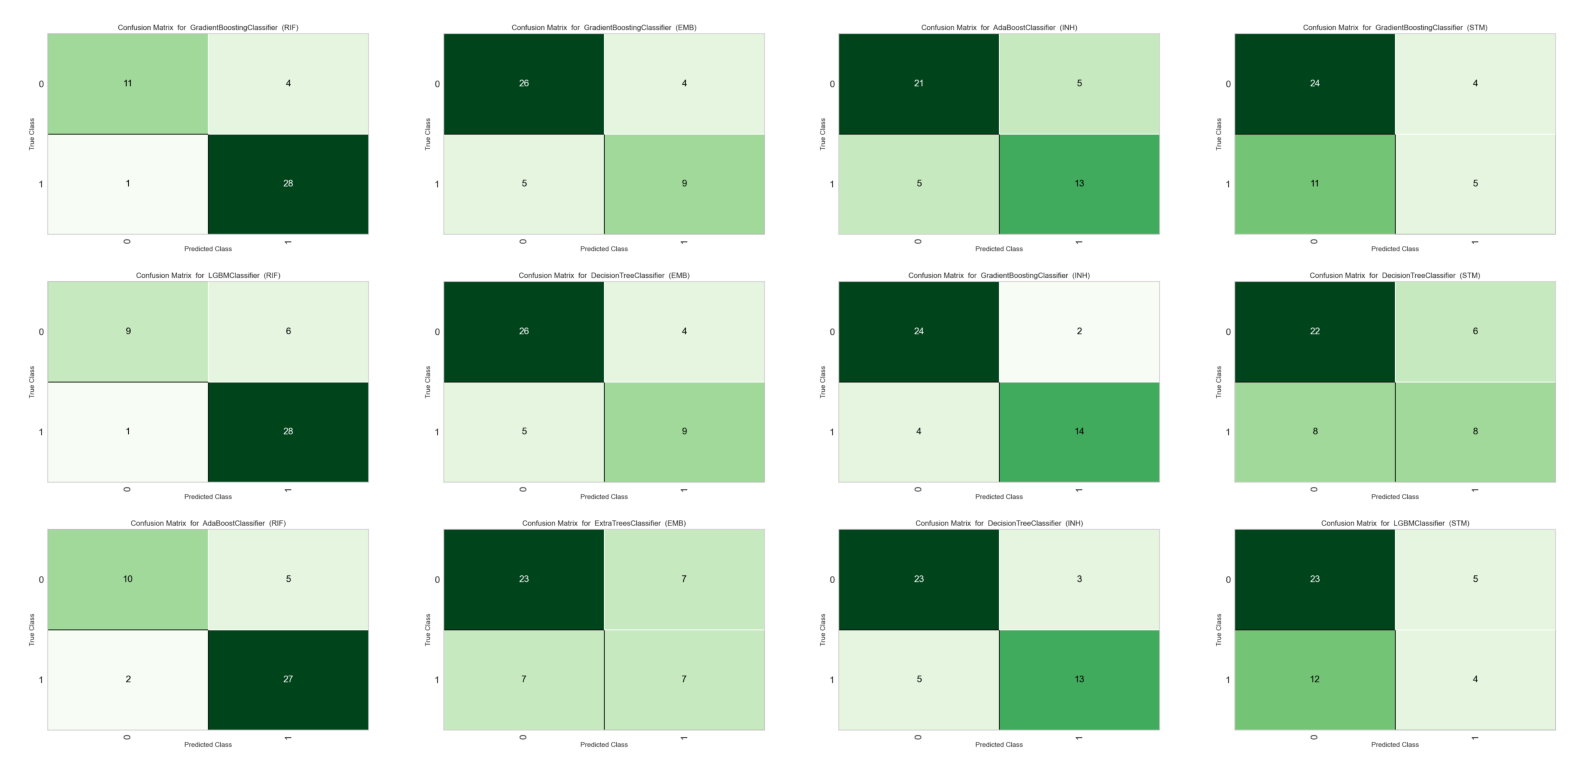

In [63]:
# combining the drugs into one plot

#AUC
file_paths = ["Plots/RIF/CM_RIF_top3.png", 
              "Plots/EMB/CM_EMB_top3.png", 
              "Plots/INH/CM_INH_top3.png",
             "Plots/STM/CM_STM_top3.png"]

# Read the PNG files
plots = [mpimg.imread(path) for path in file_paths]

# Create subplots with two rows and two columns
fig, axes = plt.subplots(1, 4, figsize=(16, 12), gridspec_kw={'height_ratios': [1]})

# Display the images
for i, (plot, ax) in enumerate(zip(plots, axes.flatten())):
    ax.imshow(plot)
    ax.axis('off')
    #ax.set_title(f'Plot {i+1}')

# Adjust layout
plt.tight_layout()
# Save the plot
plt.savefig('Plots/CM_all_drugs.png',dpi =600)
# Show the plots
plt.show()

